In [1]:
import numpy as np

In [46]:
%matplotlib qt

si `%matplotlib qt` est activée, on aura les figures dans des fenêtres séparées, ce qui permet d'interagir avec la figure:
zoomer, faire défiler, faire tourner (si figure en 3D)

IMPORTANT: si vous commentez %matplotlib qt et importez ensuite `import matplotlib.pyplot as plt`, 
vous ne pouvez plus réactiver l'interactivité. Pour le faire, il faudra faire 
Noyau > Redémarrer...
inversement, une fois activée, il faut redémarrer le noyau, puis `import matplotlib.pyplot as plt` sans utiliser la ligne `%matplotlib qt`


In [3]:
import matplotlib.pyplot as plt

# TP1: 

On commence en douceur.

# TP1 - Représentation de données

(environ 1h30-1h45 au total)

Dans ce TP, nous allons voir/rappeler les façons les plus élémentaires de représenter des données:
- des représentations de la distribution de probabilité associée à des données (la pdf, probability density funciton)
- la cumulative associée aux données.

Et ceci, en dimensions:
- D=1
- D=2

## Partie 1 -  D=1 - PDF et CDF

Durée totale (de la dimension $D=1$) : environ 45 minutes

- Utilisez `np.shape` ou `monTableauDeTypeNpArray.shape` pour voir a quoi ressemble les métadonnées.
- Observez quelques valeurs.
- utilsez `plt.scatter` pour avoir un premier aperçu des données.

In [4]:
X = np.loadtxt("tp1-data-1.dat")

In [6]:
X.shape

(2000,)

In [8]:
X[1:10]

array([-1.48264527, -2.60188975, -2.41982865, -2.09742213, -0.89811601,
        0.4368024 , -1.9618104 , -1.63127505, -0.12641691])

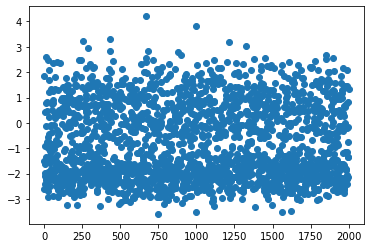

In [20]:
plt.scatter(np.arange(0, X.size, 1), X)

### On souhaite tracer l'hisogramme des données, sans trop tricher (mais un peu quand meme)

Note: Pour commencer, utilisez un nombre de bins de `Nombre_de_bins=100` (on peut aussi noter `Nbins`)

On souhaite: (15 minutes)
- définir à la main la liste des "bins", c.a.d. des intervalles à utiliser, lorsqu'on "découpe" l'intervalle des x (des abcisses) en morceaux, et qu'on "compte" le nombre de points qui sont dedans. On peut utiliser `np.linspace` par exemple. Il est recommandé d'utiliser aussi les fonctions `np.min` et `np.max` pour savoir où l'intervalle des bins doit commencer et finir.
- utiliser la fonction `np.histogram` (allez voir la doc ! -> sur internet) pour obtenir la densité de proba associée aux données `X` et aux "bins" choisis.
- tracer le résultat, à l'aide de `plt.plot(votre_array_a_mettre_en_abcisse, votre_array_a_mettre_en_ordonnees)`

Ensuite (5 minutes)
- faire une boucle pour voir comment le résultat dépend de la valeur de `Nombre_de_bins`.  On pourra utiliser `plt.figure()` pour éviter que tous les tracés (plots) soient sur la même figure, ce qui peut la rendre illisible.
- En comparant les figures, pouvez vous dire quelle est "la bonne valeur" à choisir pour `Nombre_de_bins`?  Cette question semble-t-elle mathématiquement bien posée ?

Bonus: (5 minutes)
- re-faire, à la main (sans "tricher") le code correspondant à la fonction  `np.histogram`, à la main. (c'est assez facile !!)

In [21]:
Nbins = 100

In [41]:
bins = np.linspace(np.min(X), np.max(X), Nbins)

In [42]:
density, _ = np.histogram(X, bins, density = True)
#??np.histogram

In [56]:
_ = plt.hist(X, bins, density = True)
plt.plot(bins[:-1] - ((bins[0] - bins[1]) / 2), density)

In [55]:
#??plt.figure

In [65]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
axes[5].remove()
for i, Nbins in enumerate([1000,300,100,30,10]):
    bins = np.linspace(np.min(X), np.max(X), Nbins)
    _ = axes[i].hist(X, bins, density = True, label=str(Nbins))
    axes[i].legend()

In [66]:
#La meilleur valeur semble etre 100, c'est ce qui semble le plus propre visuelement.

## CDF 

La fonction cumulative (Cumulative Density Function) est définie ainsi, mathématiquement:
$$ C(x) = \int_\infty ^x ds P(s) $$

Tracer la CDF empirique des données: (15 min)
- trier les données à l'aide de la fonction `np.sort` (elle ne travaille pas *in-place*, mais renvoie un résultat)
- définir les valeurs qui seront prises par la CDF: $0/N, 1/N, 2/N, ... N/N$
- tracer cette "fonction en escalier" à l'aide de ces définitions (sans forcément garantir que ce soit *exactement* un escalier). Utiliser `plt.plot`

In [67]:
N = X.shape[0]

In [68]:
X_sorted = np.sort(X)

In [95]:
Y = np.arange(0, 1, 1 / N) + 1/ N

In [99]:
plt.plot(X_sorted, Y)

### Commentaires:

Questions: (3 min)
- En quoi cette représentation est-elle **plus** satisfaisante que la PDF ?
- En quoi cette représentation est-elle **moins** satisfaisante que la PDF ?

Les histogrammes sont visuellement plus parlants.
Pour la CDF, plus il y a de valeur plus c'est aplati. Il n'y a pas de "pertes".

---------

## Partie 2 -  D=2 - PDF et CDF

Durée totale (de la dimension $D=2$) : environ 30 minutes

In [98]:
X2 = np.loadtxt("tp1-data-2.dat")

### Prendre en main ce 2ème jeu de données

(5-10 minutes)

Par exemple:
- regarder le format des données (`np.shape(X)` ou `X.shape`)
- faire un scatter-plot (`plt.scatter`)

In [100]:
np.shape(X2)

(1000, 2)

In [103]:
plt.scatter(X2[:, 0], X2[:, 1])

### PDF : histogramme d'une distribution de deux variables (données "en deux dimensions")

On va utiliser `np.histogram2d`.

On donne d'abord un exemple de réalisation de tracé en 3D.

In [104]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [105]:
## exemple de figure 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
Xinput = np.arange(-20,20,1)
Yinput = np.arange(-10,10,2)
X, Y = np.meshgrid(Xinput, Yinput)  # on fabrique une grille à partir de 2 arrays simples.
Z = X**2-Y**2 # la surface à tracer 
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.8, aspect=7)

In [106]:
Yinput, Y

(array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8]),
 array([[-10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
         -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
         -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
         -10],
        [ -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,
          -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,
          -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,
          -8],
        [ -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,
          -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,
          -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,
          -6],
        [ -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,
          -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,
          -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,
       

### Tracé de l'histogramme

(10 minutes)

En utilisant `np.histogram2d` (comme ci dessous, mais en adaptant), et en adaptant le code du tracé 3D ci dessus, faites l'histogramme de la distribution X2 avec différentes valeurs de `Nbins`.

On peut faire des tracés 3D (comme ci dessus), mais on peut aussi préférer utiliser `plt.contourf` (plutôt plus simple à invoquer et plutôt meilleur pour la visualisation.. ça dépend des préférences de chacun.e)

### CDF en D=2 - approximativement

(10 min)

On n'est pas véritablement intéressés par la construction de la CDF en 2D, donc on va juste faire un tracé qui ressemblera, à l'aide de la fonction `np.cumsum` (**cum**ulative **sum**mation, c.a.d. somme cumulée)

In [ ]:
np.cumsum(density,axis=1).shape, density.shape

## Partie 3 - Estimation de la complexité des descriptions.

(10-15 minutes, dégainez votre papier-crayon !)

Maintenant, il est intéressant de se demander **quelle est la complexité de chaque représentation** des données.

On peut par exemple compter le nombre de nombre réels (floats) à enregistrer, dans chacun des cas:
- données brutes
- représentation en histogramme, avec un nombre Nbins de bins.
- représentation avec la CDF (empirique).

Et ceci, pour les différentes dimensions:
- en D=1
- en D=2
- en D=D (cas générique) (vous pouvez faire ce cas général directement si vous le sentez bien).

## Partie 4 - Conclusion

(10-15 minutes, papier-crayon)

Pour Nbins=100, et N=1 000 000, à partir de quelle valeur de la dimension $D$ est-il plus intéressant de simplement garder les données telles qu'elles sont, plutôt que d'en tracer un histogramme ?

On peut chercher à résoudre l'équation (ou au moins, la poser, puis la résoudre à l'aide d'un logiciel de calcul formel, par exemple en ligne avec Wolfram Alpha).

On peut aussi calculer le coût du stockage des données/de l'histogramme, en dimensions D=1,2,3,4,5,...